[![Le Baladin](https://img.shields.io/badge/Le_baladin-NGC_5395_les_perles_de_Dragons-blue.svg)](https://sites.google.com/view/astronomie-ut1/accueil)

_Dominique Touzan_<sup>1,2</sup>

<sup>1</sup>Notebook: https://anaconda.org/dtouzan/NGC5395/notebook

<sup>2</sup>Correspondance: [dtouzan@gmail.com](mailto:dtouzan@gmail.com)

Édition   1.0, révision 01/04/2020 - 30/06/2020

---
**Résumé** : Pour cette fin de printemps et début d'été les nuits commencent à être de plus en plus courtes voir trop courtes fin juin. La pise d'images du ciel profond est difficilement réalisabe mais les grands télescopes nous fournissent avec leurs archives de bien belle images. L'observatoire GEMINI[[1]](#ref1) nous donne aussi accès au programme de traitement de ses archives en développant la suite logiciel DRAGONS 2.1.1, celle ci peut facilement s'installer sur un PC Linux UBUNTU ou Windows 10 et fonctionne sous python 3.6. L'image de NGC 5395 & NGC 5394 traitée dans ce notbook est réalisée avec la caméra GMOS-N[[2]](#ref2) du télescope Gemini North. Ces galaxies que j'ai prise avec mon instrument bien plus petit voir minuscule à coté de celui du Gemini North se trouve dans la constellation des Chiens de chasse plus à l'Ouest de l'étoile Gamma Bouvier qu'à l'Est de Alpha 1 & 2 Chiens de chasse. Cette objet du ciel "profond" pour nous amateurs est bien observable sous notre latitude à la période du printemps. Pour le traitement sous Jupyter lab de nombreux paquets sont utilisés pour la création et visualisation de la mosaïc et des reports de données des catalogues Simbad et NED.

_Mots-clés_ : Galaxie - Dragons - Gemini - GMOS

---
[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/)

## Environnement de Travail
- UBUNTU 20.04
- ANACONDA 4.8.3
- PYTHON 3.7.6
- DRAGONS 2.1.1 / PYTHON 3.6.5
- JUPYTER LAB 2.1.5
- ASTROPY 4.0.1.post1
- ASTROQUERY 0.4
- SUN GRID ENGINE 8.1.9
- Archives du GEMINI OBSERVATORY : https://archive.gemini.edu/searchform

---


## Configurations et traitements
#### Shell de traitement des images

In [143]:
!cat ~/dragons/science_lauch.sh

#!/bin/bash

# >>> conda initialize >>>
# !! Contents within this block are managed by 'conda init' !!
__conda_setup="$('/opt/anaconda/anaconda3/bin/conda' 'shell.bash' 'hook' 2> /dev/null)"
if [ $? -eq 0 ]; then
    eval "$__conda_setup"
else
    if [ -f "/opt/anaconda/anaconda3/etc/profile.d/conda.sh" ]; then
        . "/opt/anaconda/anaconda3/etc/profile.d/conda.sh"
    else
        export PATH="/opt/anaconda/anaconda3/bin:$PATH"
    fi
fi
unset __conda_setup
# <<< conda initialize <<<

# Bash de lancement SCIENCE 

# Variable objet
OBJET=$1
# Variable FILTRE
WAVEBAND=$2

# Repertoire des donnees
REP=~/dragons/dataset/$OBJET

# Activation env Dragons
conda activate dragons
caldb list
echo "DATASET:"$REP
echo "FILTRE:"$WAVEBAND
echo "DATAWORK:"$WAVEBAND-$OBJET

# Création répertoire BIAS
mkdir -p ~/dragons/bias
cd ~/dragons/bias
# Selection des BIAS
dataselect --tags BIAS $REP/*.fits -o list_of_bias.txt
# Lancement BIAS
reduce @list_of_bias.txt -p stackFrames:operation=median stackFr

#### Shell de lancement Sun Grid Engine

In [146]:
!cat ~/dragons/rundragons.sh

#!/bin/bash

#$ -N GMOS-N
#$ -cwd
#$ -q GMOS-N
#$ -V

## $1 nom image finale
## $2 filtre
~/dragons/science_lauch.sh $1 $2

#### Lancement des traitements

L'applicatif SGE est installé sur le serveur (ici un PC portable) et configuré avec une queue GMOS-N dont la configuration "np_load_avg=0.5" permet de faire passer les tâches une par une pour ne pas saturer le PC. Il y a possibilité de lancer les traitements sur un PC ou serveur, UBUNTU ou Windows (voir installation UBUNTU sur windows 10) distant avec ce genre de gestionnaire de queue. Il n'est pas nécessaire de lancer le shell de traitement dans une tache SGE celui-ci fonctionne en étant lancé directement.

Les paramètres du shell sont le répertoire ou se trouve les images téléchargées et le filtre utilisé. Pour le répertoire celui ci est dans ~/dragons/dataset mais le shell de traitement peut être modifié ci besoin.

Lancement des tâches pour les filtres g, r, i, Hac et vérification des lancements (bon c'est long sur le PC).

In [1]:
!qsub ~/dragons/rundragons.sh ngc5394 g
!qsub ~/dragons/rundragons.sh ngc5394 r
!qsub ~/dragons/rundragons.sh ngc5394 i
!qsub ~/dragons/rundragons.sh ngc5394 HaC

Your job 55 ("GMOS-N") has been submitted
Your job 56 ("GMOS-N") has been submitted
Your job 57 ("GMOS-N") has been submitted
Your job 58 ("GMOS-N") has been submitted


In [2]:
!qstat -f
!qstat -t

queuename                      qtype resv/used/tot. load_avg arch          states
---------------------------------------------------------------------------------
GMOS-N@ut1                     BIP   0/1/1          0.36     lx-amd64      
     55 0.55500 GMOS-N     ut1          r     06/15/2020 19:05:59     1        
---------------------------------------------------------------------------------
Observatoire@DESKTOP-3T7AJU3.l BIP   0/0/1          0.58     lx-amd64      

############################################################################
 - PENDING JOBS - PENDING JOBS - PENDING JOBS - PENDING JOBS - PENDING JOBS
############################################################################
     56 0.55500 GMOS-N     ut1          qw    06/15/2020 19:05:56     1        
     57 0.55500 GMOS-N     ut1          qw    06/15/2020 19:05:57     1        
     58 0.55500 GMOS-N     ut1          qw    06/15/2020 19:05:57     1        
job-ID  prior   name       user         state submi

#### Résultats des traitements

Les traitements se retrouvent dans le répertoire ~/dragons avec les noms "objet-filtre.fits" (peut être modifié dans le shell de traitement). Les fichiers "_stack.fits" sont disponibles dans chaque répertoire de travail mais ne sont pas ajouté à la base via la commande "caldb". Les flats de chaque traitement sont supprimés de la base via la commande "caldb remove" par le shell de traitement. Les bias ne sont pas supprimés automatiquement de la base pour cause de multi traitement (dans le cas de lancement multi tâches), mais un shell de nettoyage peut être exécuté.

In [3]:
!ls ~/dragons/*.fits

/home/ut1/dragons/ngc5394-g.fits    /home/ut1/dragons/ngc5394-i.fits
/home/ut1/dragons/ngc5394-HaC.fits  /home/ut1/dragons/ngc5394-r.fits


---

## Visualisation des résultats
#### Chargement des paquets

In [21]:
import numpy as np
from matplotlib import pyplot, image, transforms
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy.table import Table
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd
from astropy import coordinates, units as u
from matplotlib.colors import LogNorm
from IPython.display import Image

#### Initialisation des images 

In [2]:
g_name = get_pkg_data_filename('/home/ut1/dragons/ngc5394-g.fits')
r_name = get_pkg_data_filename('/home/ut1/dragons/ngc5394-r.fits')
i_name = get_pkg_data_filename('/home/ut1/dragons/ngc5394-i.fits')
HaC_name = get_pkg_data_filename('/home/ut1/dragons/ngc5394-HaC.fits')
g = fits.open(g_name)[1].data
r = fits.open(r_name)[1].data
i = fits.open(i_name)[1].data
HaC = fits.open(HaC_name)[1].data

#### Visualisation des images
Ici il est utilisé "make_lupton_rgb" pour l'affichage en mode RGB mais les images de GMOS-N sont en g,r,i,HaC. J'ai ajouté i + Hac avec des coéficients ainsi que pour g et r, cela fait l'image ci-dessous avec un stretch à 10000. La variable minimun est pour le fond de ciel. L'image n'est pas à sa taille maximale. L'image du filtre HaC permet de bien faire ressortir les perles de dragons. Il reste certains artefacts car les traitements sont les premiers que je fais.

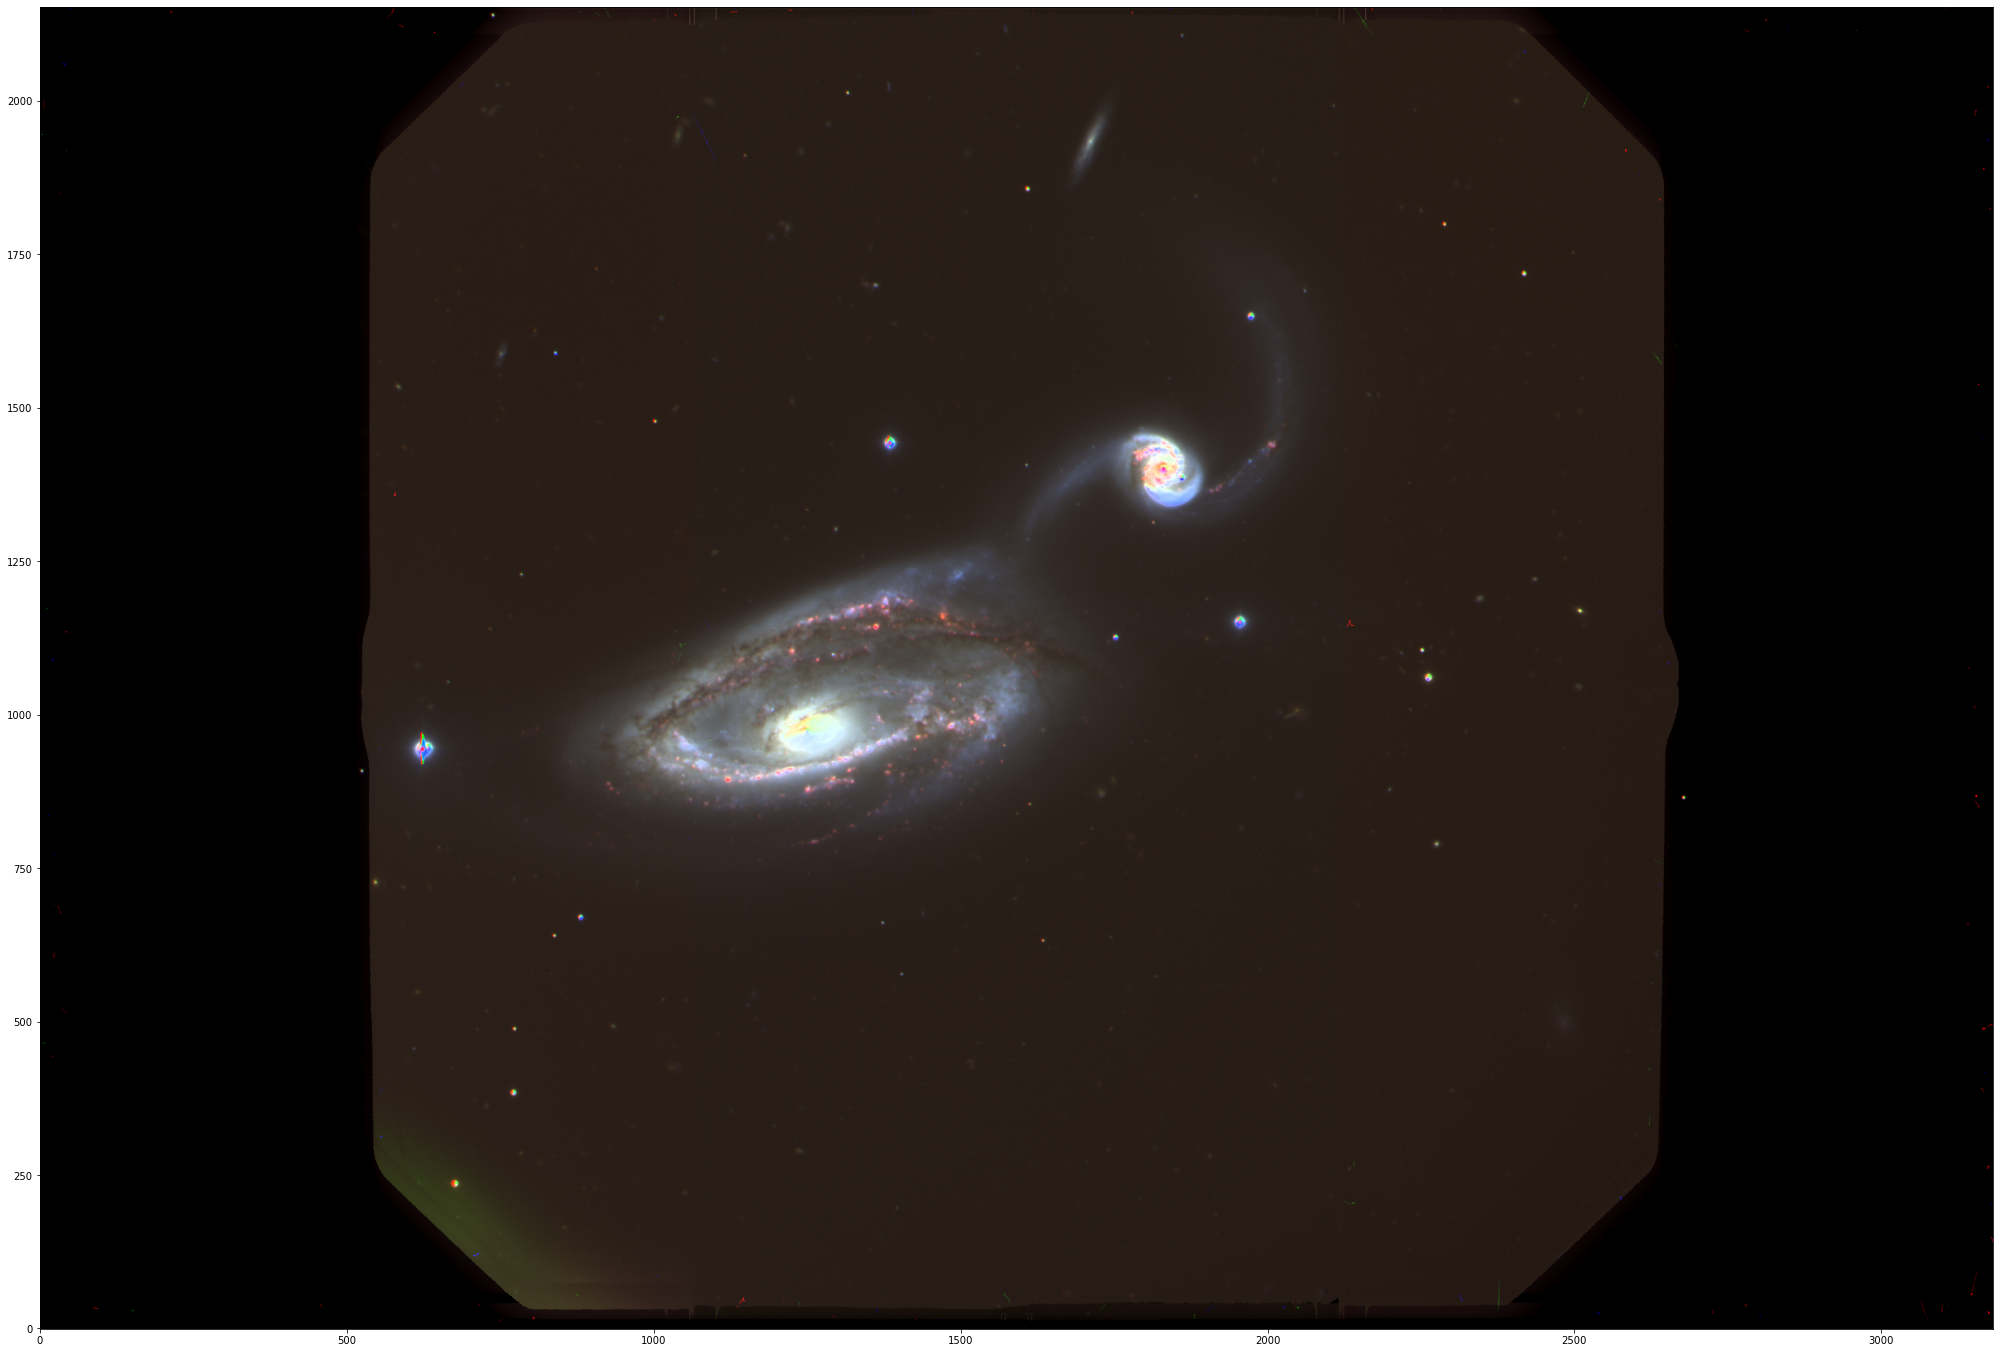

In [3]:
R = i * 0.4 + HaC * 5.5
G = r * 1.1
B = g * 2.4

plt.figure(figsize=(35,35))
plt.subplot(1,1,1)
rgb_default = make_lupton_rgb(R, G, B, minimum=700, stretch=10000, Q=0)
plt.imshow(rgb_default, origin='lower',norm=LogNorm())
plt.show()

#### Visualisation filtre HaC

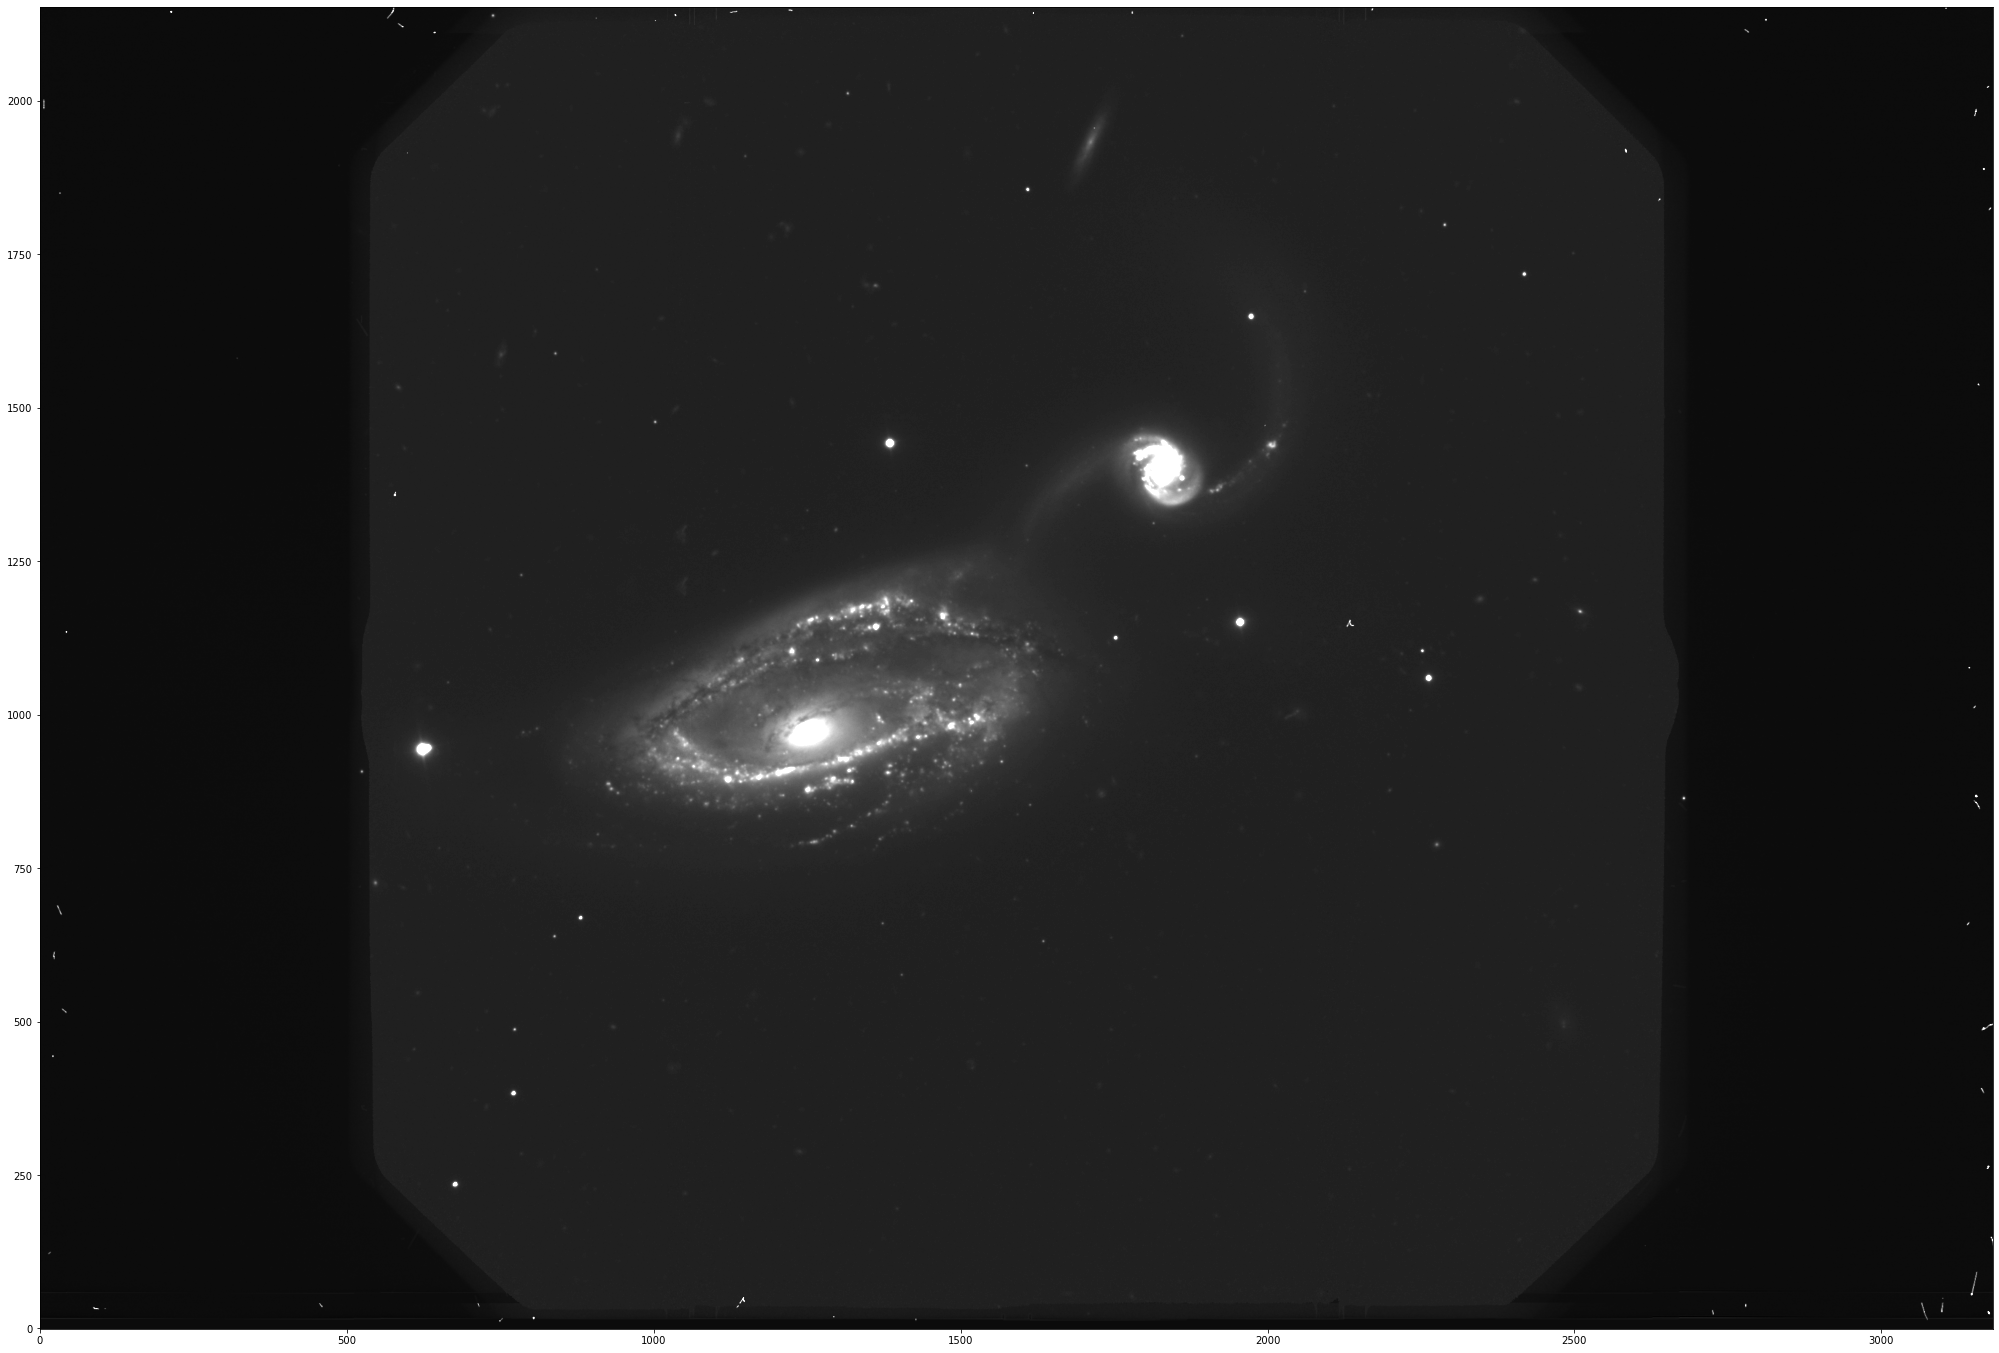

In [4]:
image_data = fits.getdata(HaC_name)
plt.figure(figsize=(35,35))
plt.subplot(1,1,1)
plt.imshow(image_data, cmap='gray',vmin=-50, vmax=1000, origin='Lower')
plt.show()

#### Visualisation filtre i

Pour faire apparître beaucoup plus de galaxies et peut être une galaxie méduse (WISEA J135839.45+372735.8) ?.

Pour la deuxième image celle ci a été reprise sous le logiciel Iris avec un doublement des dimenssions et l'application du filtre "unsharp". 

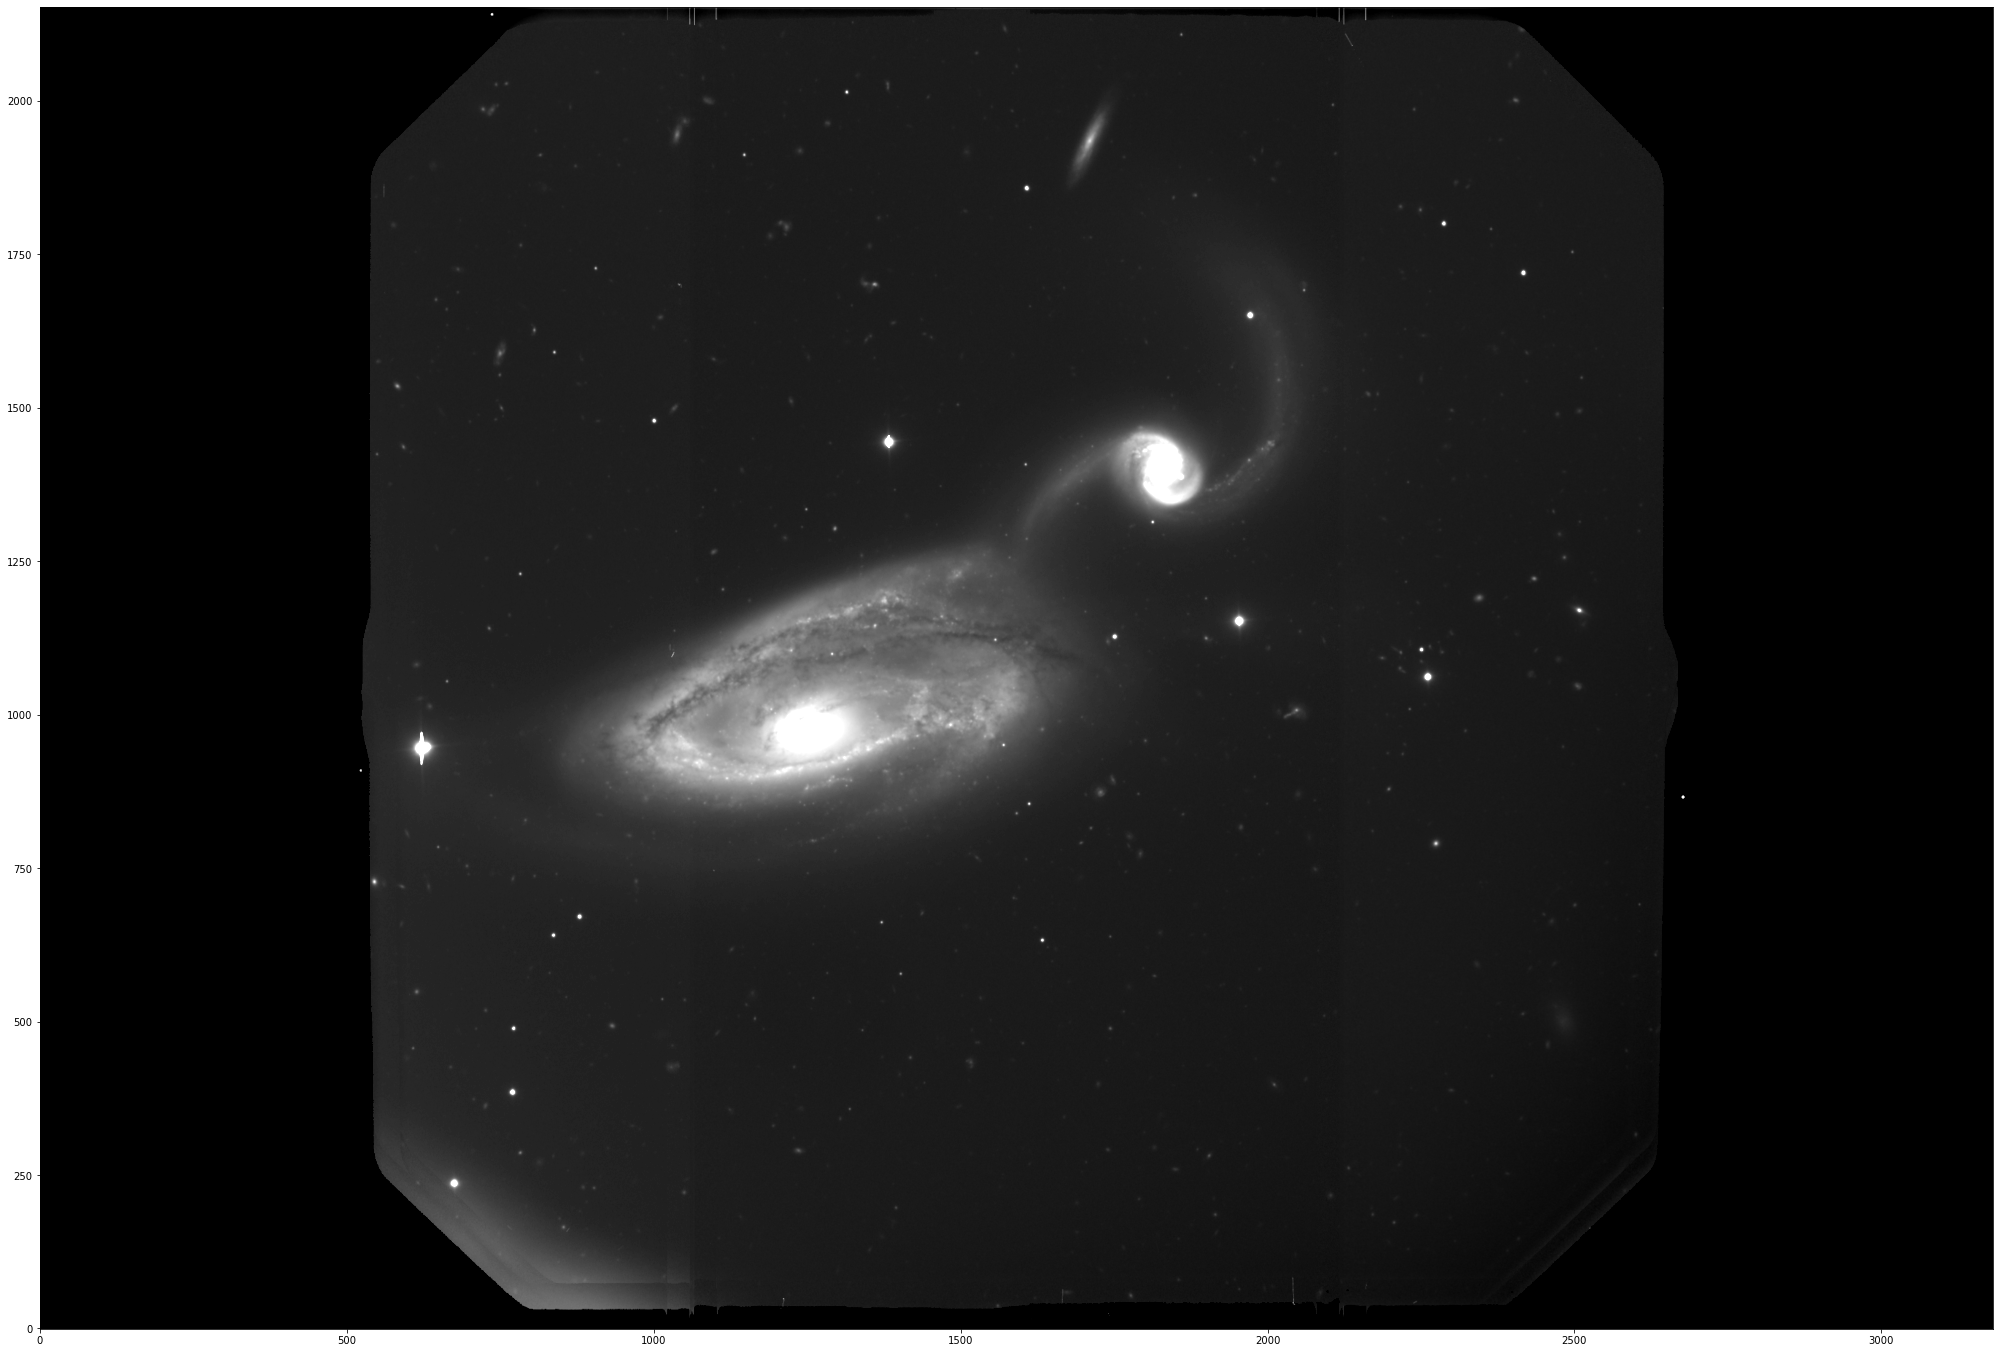

In [5]:
image_data = fits.getdata(i_name)
plt.figure(figsize=(35,35))
plt.subplot(1,1,1)
plt.imshow(image_data, cmap='gray',vmin=4000, vmax=14000, origin='Lower',norm=LogNorm())
plt.show()

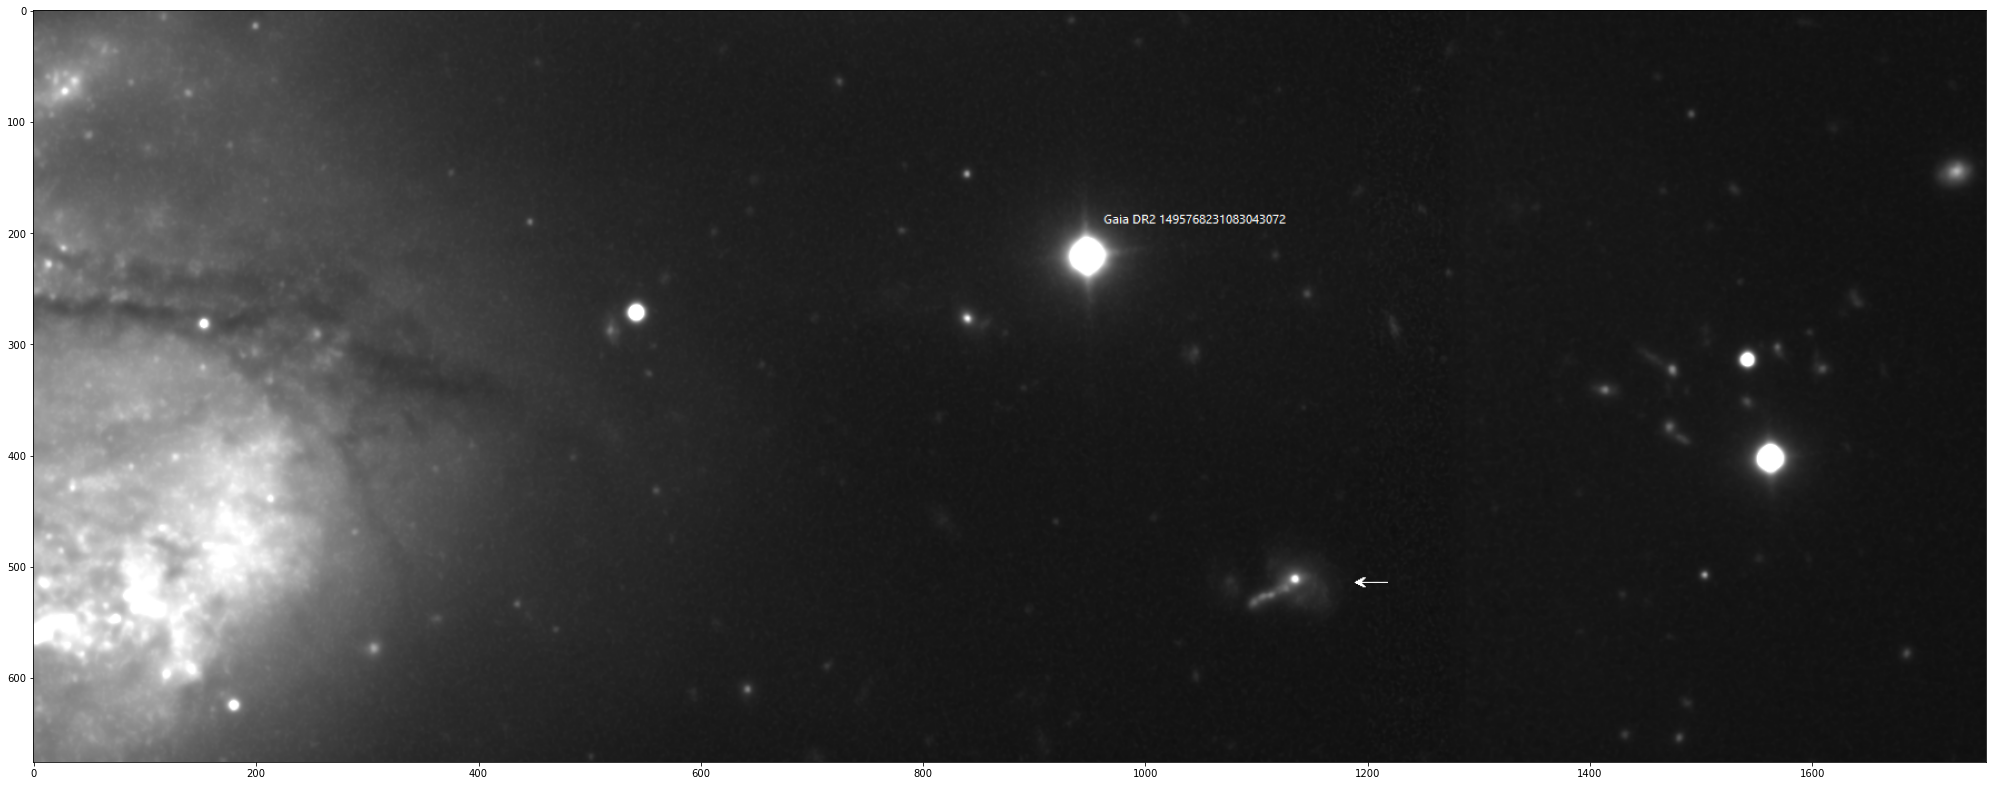

In [6]:
from PIL import Image
image_png = Image.open('gaia_DR2_field.png')
image_png_array = np.asarray(image_png)
plt.figure(figsize=(35,35))
plt.subplot(1,1,1)
plt.imshow(image_png_array)
plt.show()

## Cadrage des images

Création des tables HDU et du WCS optimal.

In [7]:
# table : liste de fichier fits
# hdus : liste des hdu des fichier fits
#table = (fits.open(g_name), fits.open(r_name), fits.open(i_name), fits.open(HaC_name), fits.open(CFHT_name))
#hdus = (table[0][1], table[1][1], table[2][1], table[3][1], table[4][0])
table = ( fits.open(HaC_name), fits.open(i_name))
hdus = (table[0][1],table[1][1])

In [8]:
# Sortie des WCS et tailles des images et recalibration.
# Résolution 0.16 arcseconde
wcs_out, shape_out = find_optimal_celestial_wcs(hdus, frame='fk5',  projection='TAN', resolution=0.16 * u.arcsec)
# Pour affichage des résultats
# wcs_out.to_header() 
# shape_out

#### Création de la mosaïc
Import des paquets reproject. La variable footprint est pour la sortie FoV 

In [9]:
# Création de la mosaïc et des champs visuels
mosaic, footprint = reproject_and_coadd(hdus, wcs_out, shape_out=shape_out, reproject_function=reproject_interp)

#### Catalogue NED

Le champ interrogé est de 3 minutes d'arc

In [10]:
from astroquery.ned import Ned
result_table_NED = Ned.query_region('NGC 5395', radius='0d3m0s')

#### Catalogue Simbad

Le champ interrogé est de 3 à 4 minutes d'arc

In [11]:
from astroquery.simbad import Simbad

# Par région et type d'objets
simbad_table_SFR = Simbad.query_criteria('region(box, NGC 5395, 0.15d 0.15d)', otype='SFR')
simbad_table_G = Simbad.query_criteria('region(box, NGC 5395, 0.15d 0.15d)', otype='G')
simbad_table_SN = Simbad.query_criteria('region(box, NGC 5395, 0.15d 0.15d)', otype='SN')
simbad_table_Rad = Simbad.query_criteria('region(box, NGC 5395, 0.15d 0.15d)', otype='Rad')
simbad_table_V = Simbad.query_criteria('region(box, NGC 5395, 0.15d 0.15d)', otype='V*')
simbad_table_Cld = Simbad.query_criteria('region(box, NGC 5395, 0.15d 0.15d)', otype='Cld')
simbad_table_GrG = Simbad.query_criteria('region(box, NGC 5395, 0.15d 0.15d)', otype='GrG')
# par Région
simbad_table = Simbad.query_region("NGC 5395", radius='0d3m0s')

#### Mosaïc des images finales

/opt/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/opt/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/opt/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/opt/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


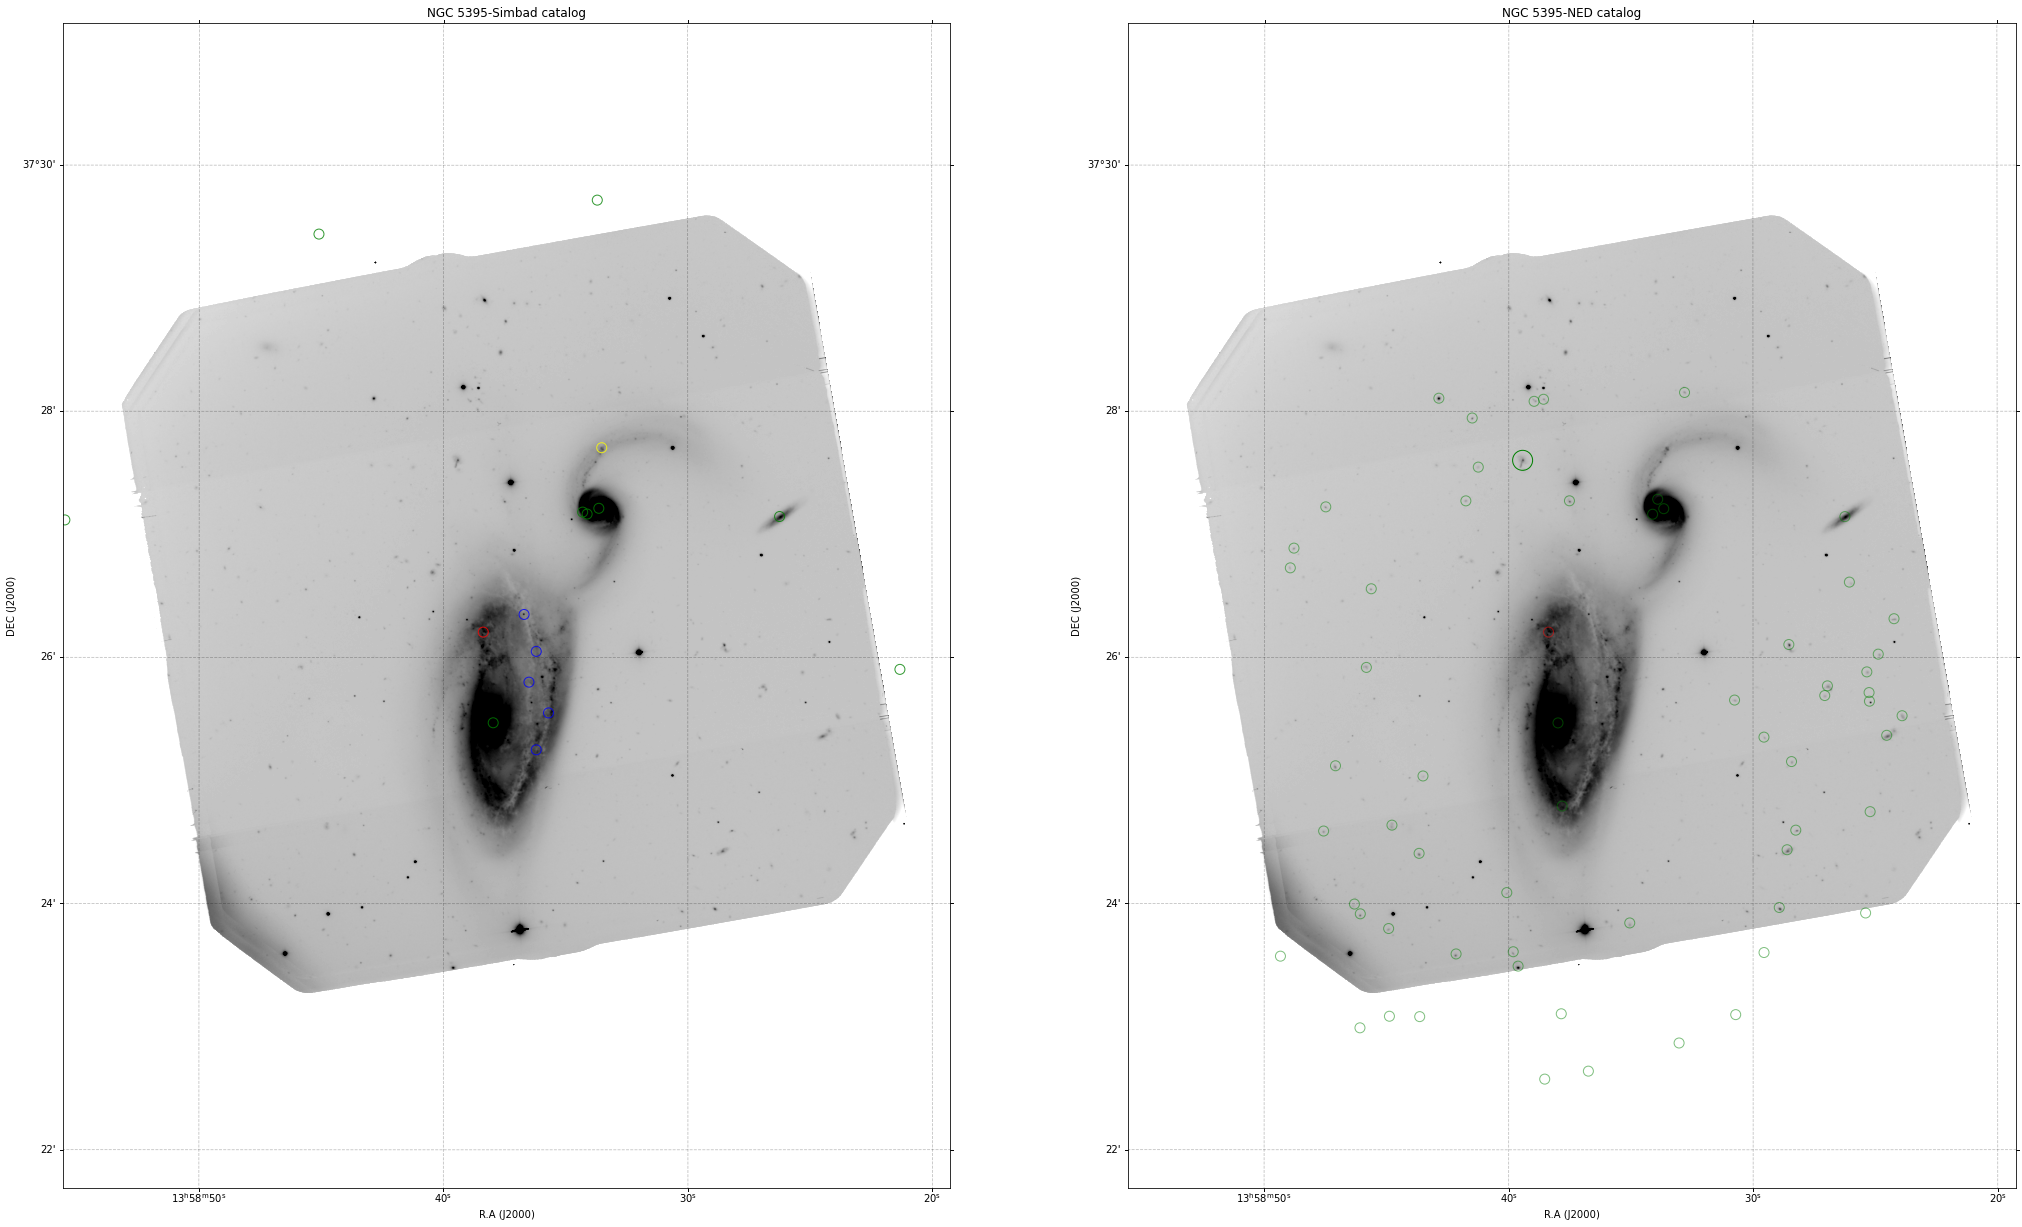

In [13]:
plt.figure(figsize=(35, 35))
ax = plt.subplot(1, 2, 1, projection = wcs_out)
ax.grid(b = True, linestyle = '--', color = 'black', alpha = 0.25)

for line in simbad_table_Cld:
    name = line['MAIN_ID']
    ra = coordinates.Angle(line['RA'], unit=u.hour)
    dec = coordinates.Angle(line['DEC'], unit=u.degree)
    color = 'blue'
    alpha = 0.8
    # Draw
    ax.scatter(ra.degree, dec.degree, transform=ax.get_transform('fk5'), s=100, edgecolor=color, facecolor='none', alpha = alpha)

for line in simbad_table_SN:
    name = line['MAIN_ID']
    ra = coordinates.Angle(line['RA'], unit=u.hour)
    dec = coordinates.Angle(line['DEC'], unit=u.degree)
    color = 'red'
    alpha = 0.8
    # Draw
    ax.scatter(ra.degree, dec.degree, transform=ax.get_transform('fk5'), s=100, edgecolor=color, facecolor='none', alpha = alpha)

for line in simbad_table_SFR:
    name = line['MAIN_ID']
    ra = coordinates.Angle(line['RA'], unit=u.hour)
    dec = coordinates.Angle(line['DEC'], unit=u.degree)
    color = 'yellow'
    alpha = 0.8
    # Draw
    ax.scatter(ra.degree, dec.degree, transform=ax.get_transform('fk5'), s=100, edgecolor=color, facecolor='none', alpha = alpha)
    
for line in simbad_table_G:
    name = line['MAIN_ID']
    ra = coordinates.Angle(line['RA'], unit=u.hour)
    dec = coordinates.Angle(line['DEC'], unit=u.degree)
    color = 'green'
    alpha = 0.8
    # Draw
    ax.scatter(ra.degree, dec.degree, transform=ax.get_transform('fk5'), s=100, edgecolor=color, facecolor='none', alpha = alpha)

im = ax.imshow(mosaic, cmap='binary', origin='lower', vmin=1800, vmax=5500,norm=LogNorm())
ax.set_xlabel('R.A (J2000)')
ax.set_ylabel('DEC (J2000)')
ax.set_title('NGC 5395-Simbad catalog')

ax = plt.subplot(1, 2, 2, projection = wcs_out)
ax.grid(b = True, linestyle = '--', color = 'black', alpha = 0.25)

for line in result_table_NED:
    name = line['Object Name']
    draw =  False
    alpha = 0.5
    size = 100
    type_object = str(line['Type'])
    if type_object == "b'G'" :
        color = 'green'
        draw = True
    if type_object == "b'SN'" :
        color = 'red'
        draw = True
    if name == 'WISEA J135839.45+372735.8' :
        color = 'green'
        draw = True
        alpha = 1
        size = 400
    # Draw
    if draw :
        ax.scatter(line['RA'], line['DEC'], transform=ax.get_transform('fk5'), s=size, edgecolor=color, facecolor='none', alpha = alpha)
    
im = ax.imshow(mosaic, cmap='binary', origin='lower', vmin=1800, vmax=5500,norm=LogNorm())
ax.set_xlabel('R.A (J2000)')
ax.set_ylabel('DEC (J2000)')
ax.set_title('NGC 5395-NED catalog')

plt.show()

#### NGC 5395 & NGC5394
Comme indiqué dans les images précédentes de nombreuses galaxies sont observables dans cette prise de vue (cercle vert) ainsi que la position de la supernova SN 2000cr (cercle rouge), des nuages HI (cercle bleu) et de la région de formation d'étoile [HHS2014] Arp84 N1 (cercle jaune) référencés dans les documentations AAS[[3]](#ref3) . Il y a aussi de nombreuses sources infrarouges et ultraviolet. L'image n'est pas à sa taille maximale.

/opt/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/opt/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


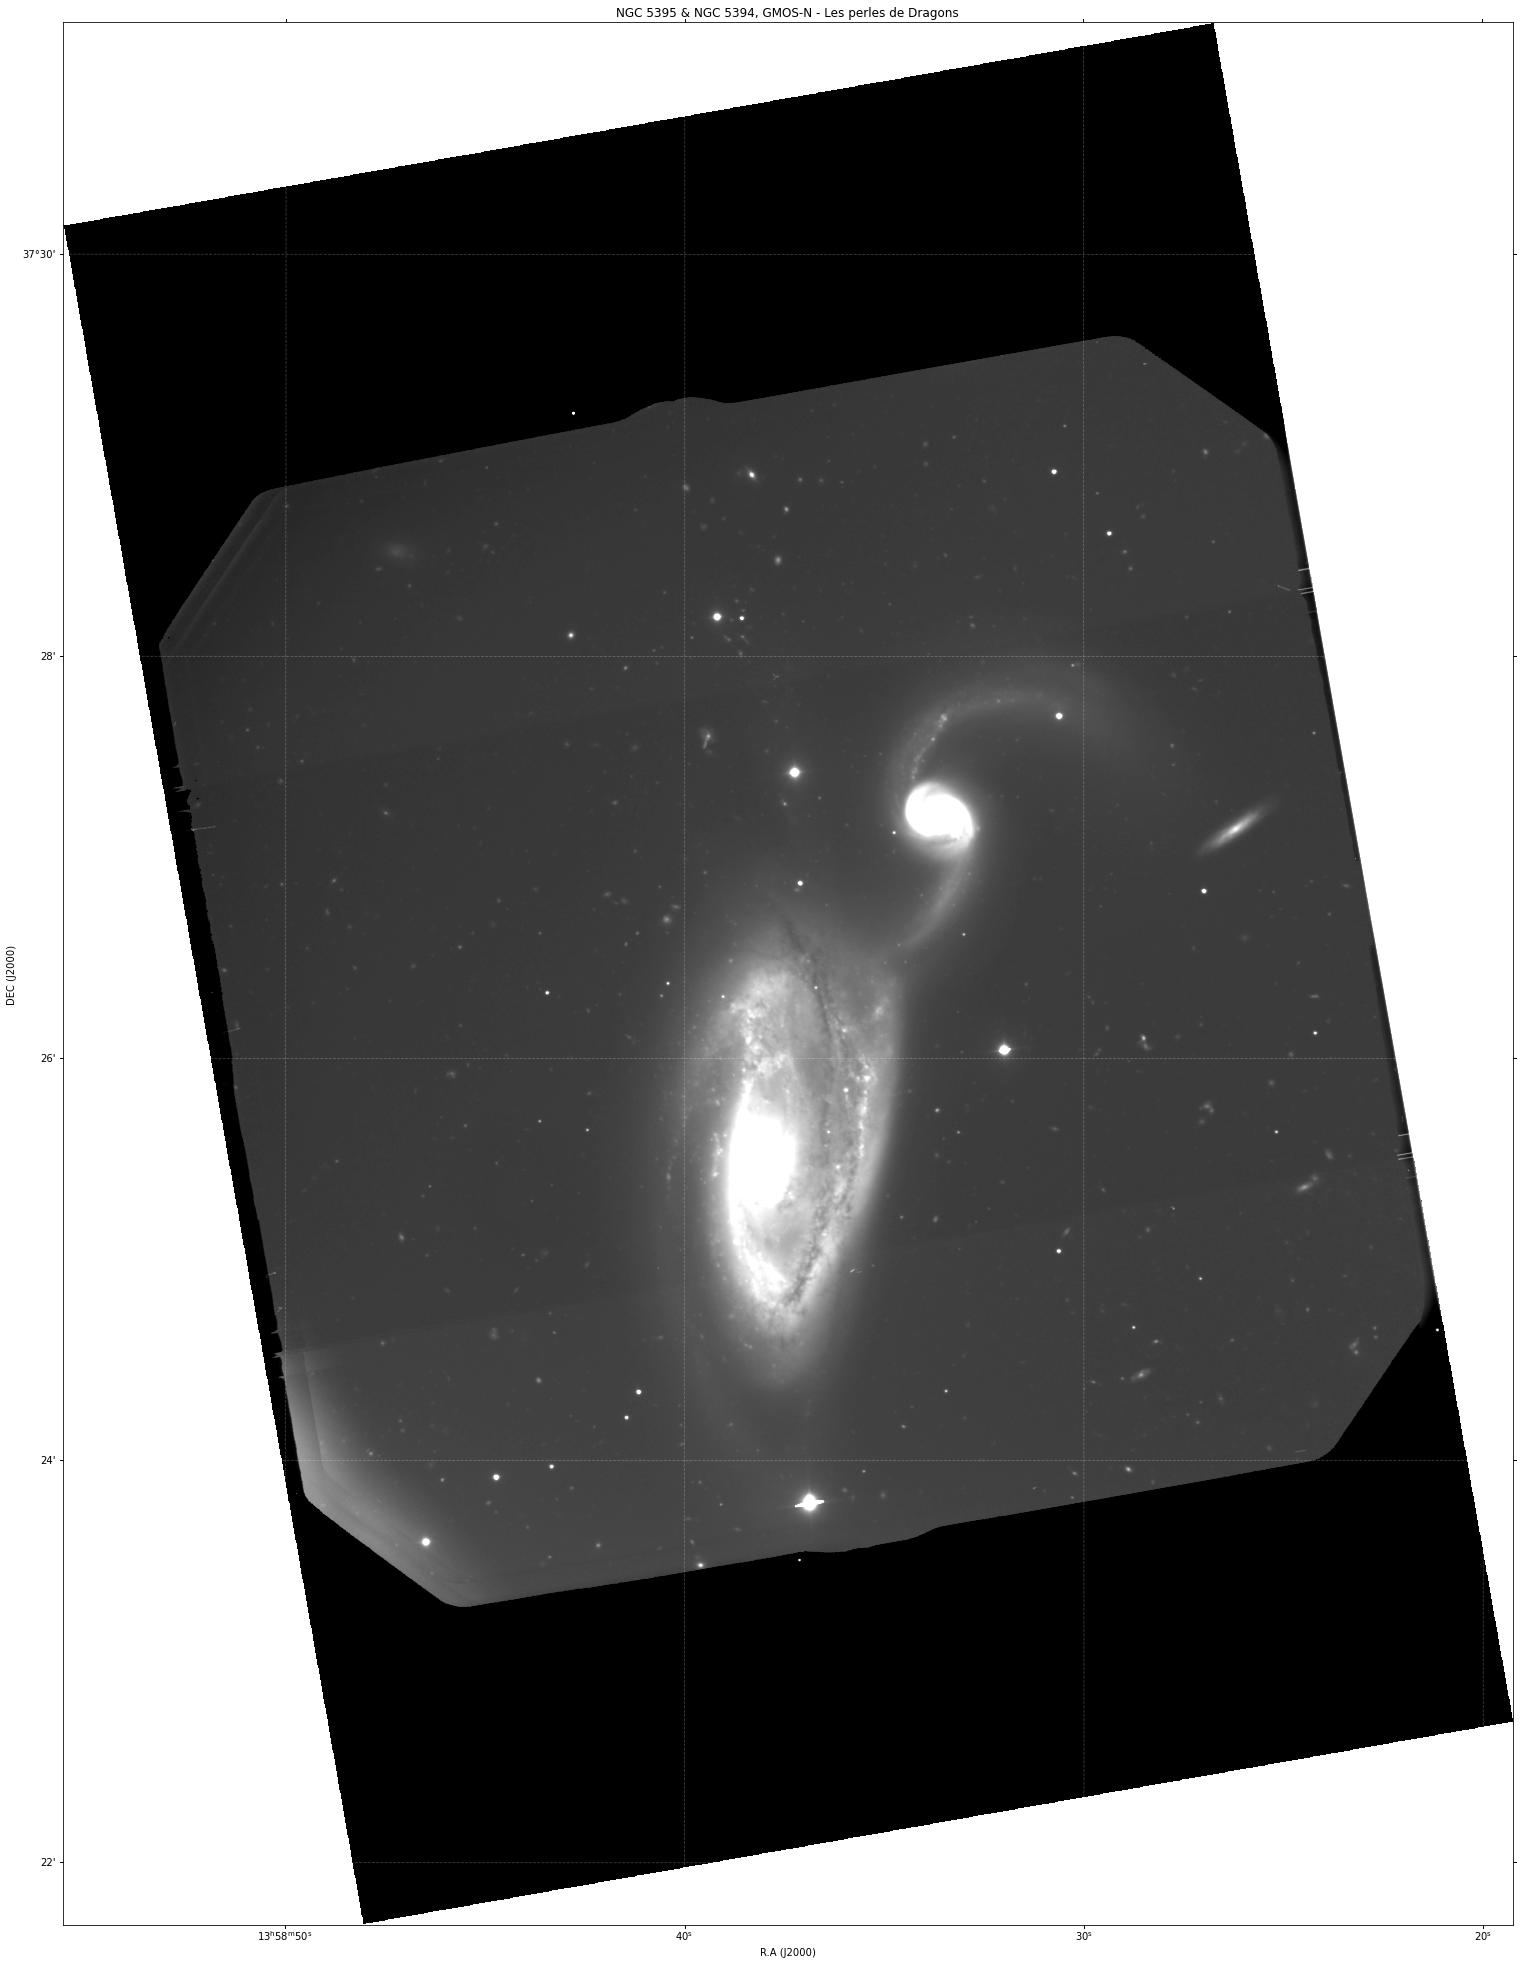

In [16]:
plt.figure(figsize=(35, 35))
ax = plt.subplot(1, 1, 1, projection = wcs_out)
ax.grid(b = True, linestyle = '--', color = 'w', alpha = 0.25)
im = ax.imshow(mosaic, cmap='gray', origin='lower', vmin=1800, vmax=5500,norm=LogNorm())
ax.set_xlabel('R.A (J2000)')
ax.set_ylabel('DEC (J2000)')
ax.set_title('NGC 5395 & NGC 5394, GMOS-N - Les perles de Dragons')
plt.show()

Table. 1. Données archive Gemini 

Les images téléchargées pour ce document se trouve sur https://archive.gemini.edu/searchform dans l'onglet "Search Results" et "Load Associated Calibrations". Pour les calibrations associées certaines seulement ont été téléchargées.

In [17]:
from astroquery.gemini import Observations
data = Observations.query_criteria(instrument='GMOS-N', program_id='GN-2019A-DD-106')
observations_table = Table(data)
observations_table['ut_datetime', 'filename', 'instrument', 'detector_binning', 'exposure_time', 'filter_name', 'data_label'].show_in_notebook()

_Table. 2._ Données des recherches sur le catalogue Simbad.

In [18]:
simbad_table.show_in_notebook()

_Table. 3._ Données des recherches sur le catalogue NED.

In [19]:
result_table_NED.show_in_notebook()

## Références
---
<a id='ref1'></a>
1. GEMINI Observatory, https://www.gemini.edu
<a id='ref2'></a>
1. GMOS, https://www.gemini.edu/instrumentation/current-instruments/gmos
<a id='ref3'></a>
2. AAS, https://aas.org/
    - _THE INTERACTING GALAXIES NGC 5394/5395: A POST-OCULAR GALAXY AND ITS RING/SPIRAL COMPANION_
    - _Star formation And the Interstellar medium in Nearby Tidal Streams (SAINTS): Spitzer mid-infrared spectroscopy and imaging of intergalactic star-forming objects._

## Remerciements
---
GEMINI Observatory, http://www.gemini.edu/

Kathleen Labrie, @KathleenLabrie

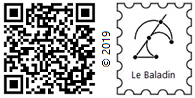

In [22]:
display(Image('signature.png'))